In [1]:
#!pip install scikit-learn
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, ParameterGrid, cross_val_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["figure.dpi"] = 200

dataset = load_wine()
X = dataset["data"]
y = dataset["target"]
feature_names = dataset["feature_names"]

In [2]:
print(type(X))
print(X.shape)
print(y.shape)
print(feature_names)

<class 'numpy.ndarray'>
(178, 13)
(178,)
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [3]:
df = pd.DataFrame(X, columns=feature_names)
df['label'] = y

# Dataset analysis

In [4]:
df.shape

(178, 14)

In [5]:
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
label                           0
dtype: int64

In [6]:
pd.DataFrame(df.groupby("label").count().iloc[:,0].values, columns=["Count"])

,Count
0,59
1,71
2,48


# Decision Tree Classifier

In [7]:
alberello = DecisionTreeClassifier()
alberello.fit(X, y)

DecisionTreeClassifier()

## Metrics and evaluation

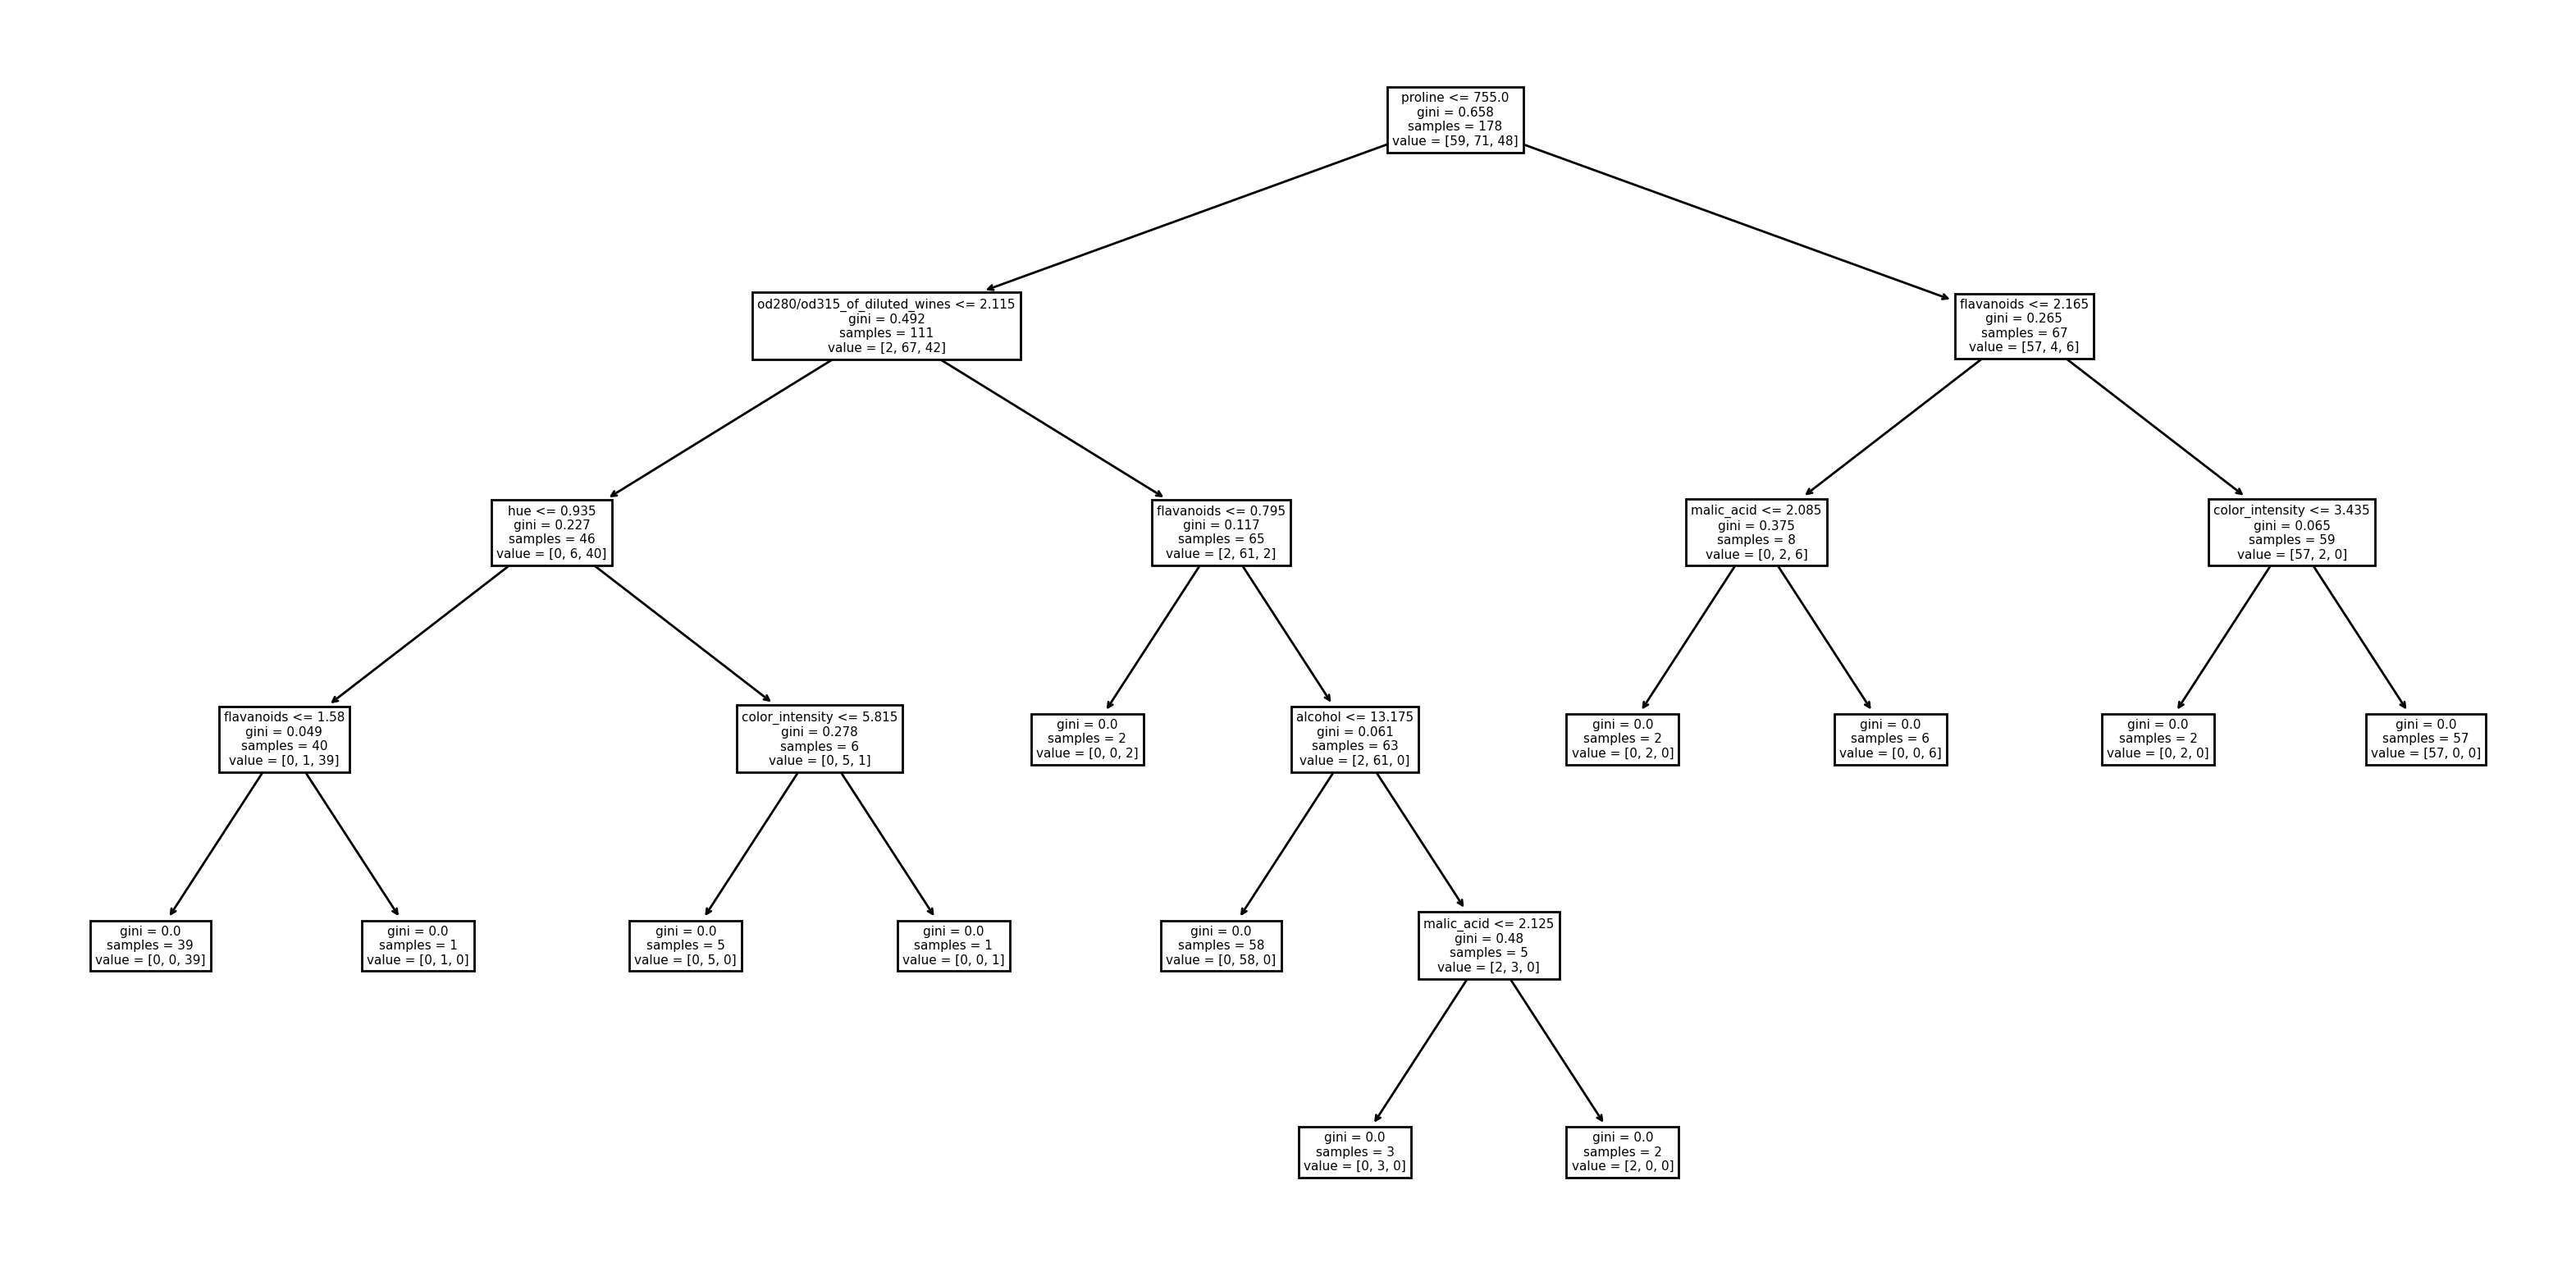

In [8]:
tplot = plot_tree(alberello, feature_names=feature_names)

Looking at the graph, the leaf nodes are way too pure with way too many samples, so it may be a good idea to cut down to the 4th level to avoid overfitting.

In [9]:
y_pred = alberello.predict(X)
accuracy_score(y, y_pred)

1.0

Accuracy score is way too high, since we are overfitted and we are testing on the train data. It obviously has to be a high score.

# Train-test version analysis

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
better_alberello = DecisionTreeClassifier()
better_alberello.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
y_pred = better_alberello.predict(X_test)
accuracy_score(y_test,y_pred)

0.8888888888888888

In [12]:
confusion_matrix(y_test, y_pred)

array([[11,  0,  0],
       [ 1, 16,  0],
       [ 0,  3,  5]], dtype=int64)

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       0.84      0.94      0.89        17
           2       1.00      0.62      0.77         8

    accuracy                           0.89        36
   macro avg       0.92      0.86      0.87        36
weighted avg       0.90      0.89      0.88        36



# Hyperparameters tuning

In [14]:
params = {
    "max_depth": [ 2, 4, 8],
    "min_samples_split": [0.001, 0.02, 0.05],
    "min_impurity_decrease": [0, 0.01, 0.05, 0.1]
}

best_conf = {}
best_value = 0
for config in ParameterGrid(params):
    clf = DecisionTreeClassifier(**config)
    score = cross_val_score(clf, X_train, y_train, cv=5, scoring="f1_weighted").mean()
    if score > best_value:
        print(config)
        print(score)
        best_conf = config
        best_value = score

{'max_depth': 2, 'min_impurity_decrease': 0, 'min_samples_split': 0.001}
0.849909736431381
{'max_depth': 2, 'min_impurity_decrease': 0, 'min_samples_split': 0.02}
0.8504937700448263
{'max_depth': 4, 'min_impurity_decrease': 0, 'min_samples_split': 0.001}
0.8914689187633356
{'max_depth': 4, 'min_impurity_decrease': 0, 'min_samples_split': 0.02}
0.8937856558315922
{'max_depth': 4, 'min_impurity_decrease': 0, 'min_samples_split': 0.05}
0.8986117759061927
{'max_depth': 4, 'min_impurity_decrease': 0.01, 'min_samples_split': 0.02}
0.9071141912263876
{'max_depth': 8, 'min_impurity_decrease': 0.01, 'min_samples_split': 0.02}
0.909051009053794


In [16]:
best_alberello = DecisionTreeClassifier(**best_conf)
best_alberello.fit(X_train, y_train)
y_pred = best_alberello.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.84      0.94      0.89        17
           2       0.83      0.62      0.71         8

    accuracy                           0.89        36
   macro avg       0.89      0.86      0.87        36
weighted avg       0.89      0.89      0.88        36

